In [1]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

In [2]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [3]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
cwd = os.getcwd()
print(cwd)
os.listdir(os.getcwd())

/content


['.config', 'sample_data']

In [5]:
%load_ext tensorboard

In [6]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
from datetime import datetime

In [10]:
import gzip
import pickle

X, y = pickle.load(gzip.open('/content/flatland_train.data', 'rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0

In [23]:
#PVZ modelio, nukopinu nuo destytojo
NAME = "model".format(int(time.time()))
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [24]:
loss = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 1s 9ms/step - loss: 1.2992 - accuracy: 0.4306 - val_loss: 1.0055 - val_accuracy: 0.5690
Epoch 2/10
125/125 [==============================] - 1s 8ms/step - loss: 0.7374 - accuracy: 0.6892 - val_loss: 0.5092 - val_accuracy: 0.7935
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.3679 - accuracy: 0.8480 - val_loss: 0.2994 - val_accuracy: 0.8665
Epoch 4/10
125/125 [==============================] - 1s 8ms/step - loss: 0.2035 - accuracy: 0.9233 - val_loss: 0.1600 - val_accuracy: 0.9325
Epoch 5/10
125/125 [==============================] - 1s 8ms/step - loss: 0.1155 - accuracy: 0.9626 - val_loss: 0.1345 - val_accuracy: 0.9430
Epoch 6/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.0553 - val_accuracy: 0.9830
Epoch 7/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0356 - accuracy: 0.9915 - val_loss: 0.0780 - val_accuracy: 0.9700
Epoch 

In [25]:
model.save('modelis.h5')

In [30]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

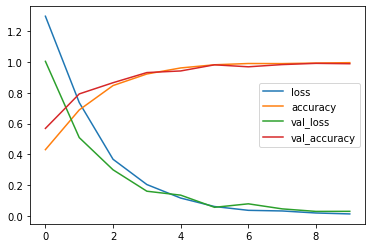

In [26]:
pd.DataFrame(loss.history).plot()

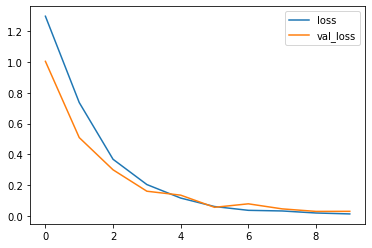

In [27]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [28]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 99.79%


In [29]:
model.save('model.h5')

In [20]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

ResourceExhaustedError: ignored